# **Breast Cancer Prediction Using Machine Leaning Classifiers**

#**Importing Libraries**

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

#**Loading Data**

In [408]:
df = pd.read_csv('data.csv')

To read data from a CSV file, we need the read_csv() function, which returns data in the form of a Dataframe.

#**Inspect Data**

In [409]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [410]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [411]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [412]:
df.shape

(569, 33)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Using the dataframe.info() function of Pandas, a brief overview of the dataframe may be obtained. When performing an exploratory study of the data, it is really helpful. We utilize the dataframe.info() function to quickly acquire a summary of the dataset. As we can see in the output, the summary includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis. 

In [414]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#**Data Cleaning**

In [415]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [416]:
# Deleting the id and Unnamed column

df= df.drop(['Unnamed: 32','id'],axis=1)

# **Perform EDA**

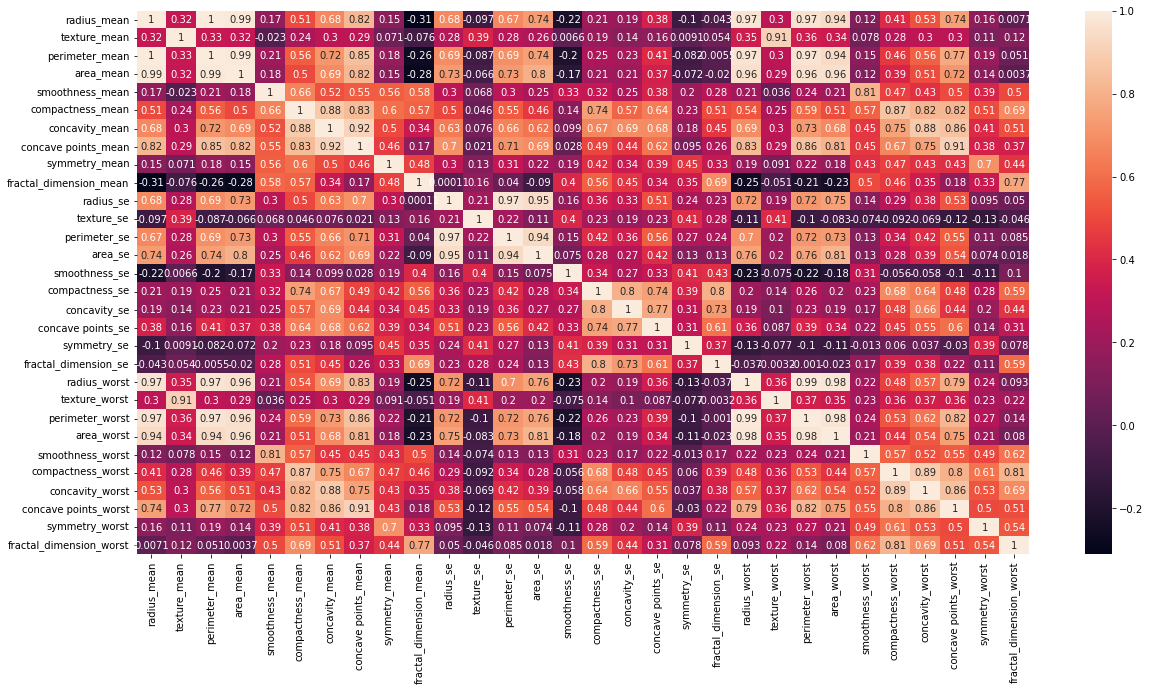

In [417]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

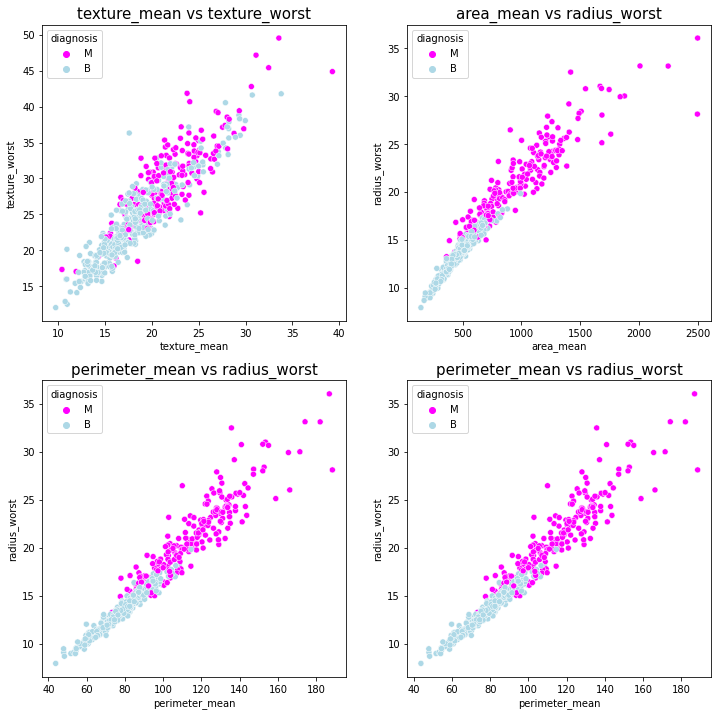

In [418]:
palette ={'B' : 'lightblue', 'M' : 'magenta'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 

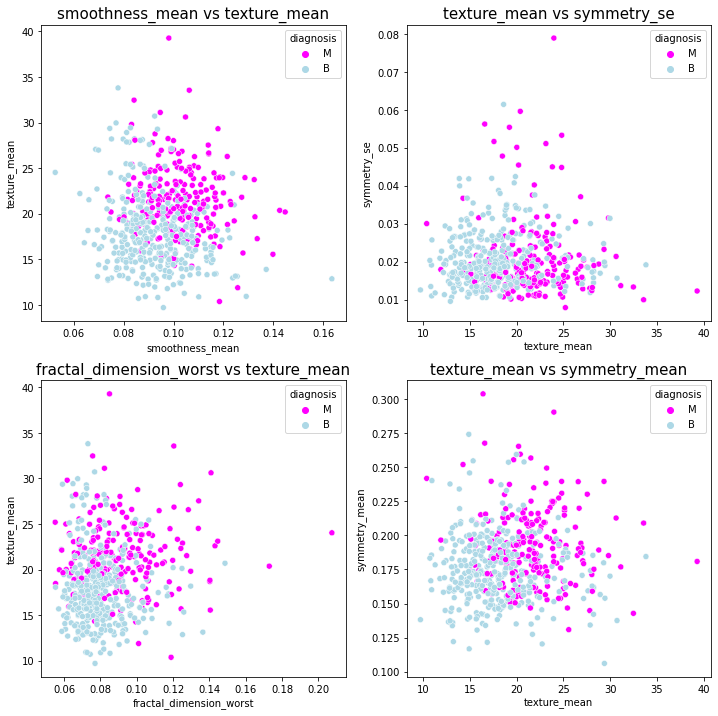

In [419]:
fig = plt.figure(figsize=(12,12))

  
plot_scatter('smoothness_mean','texture_mean',221) 
plot_scatter('texture_mean','symmetry_se',222) 
plot_scatter('fractal_dimension_worst','texture_mean',223) 
plot_scatter('texture_mean','symmetry_mean',224)
  

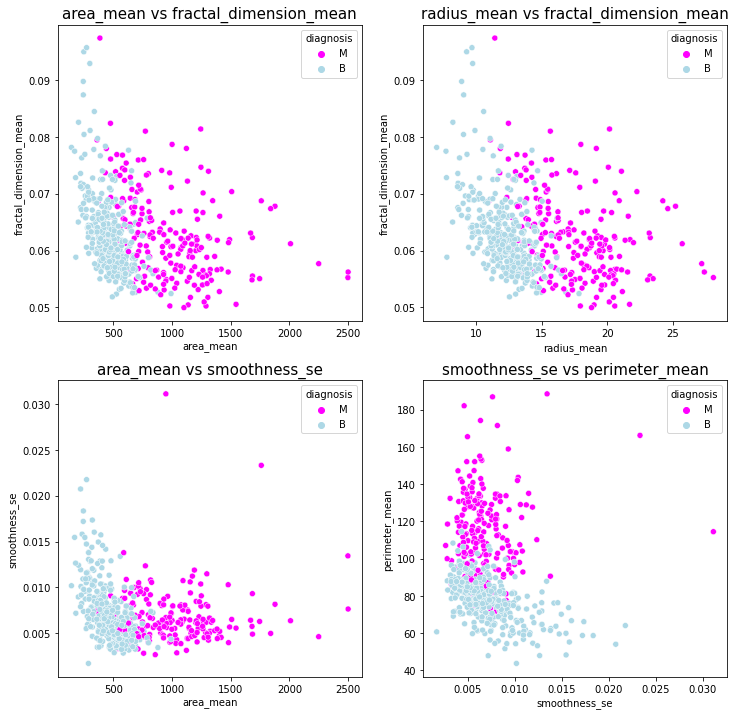

In [420]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

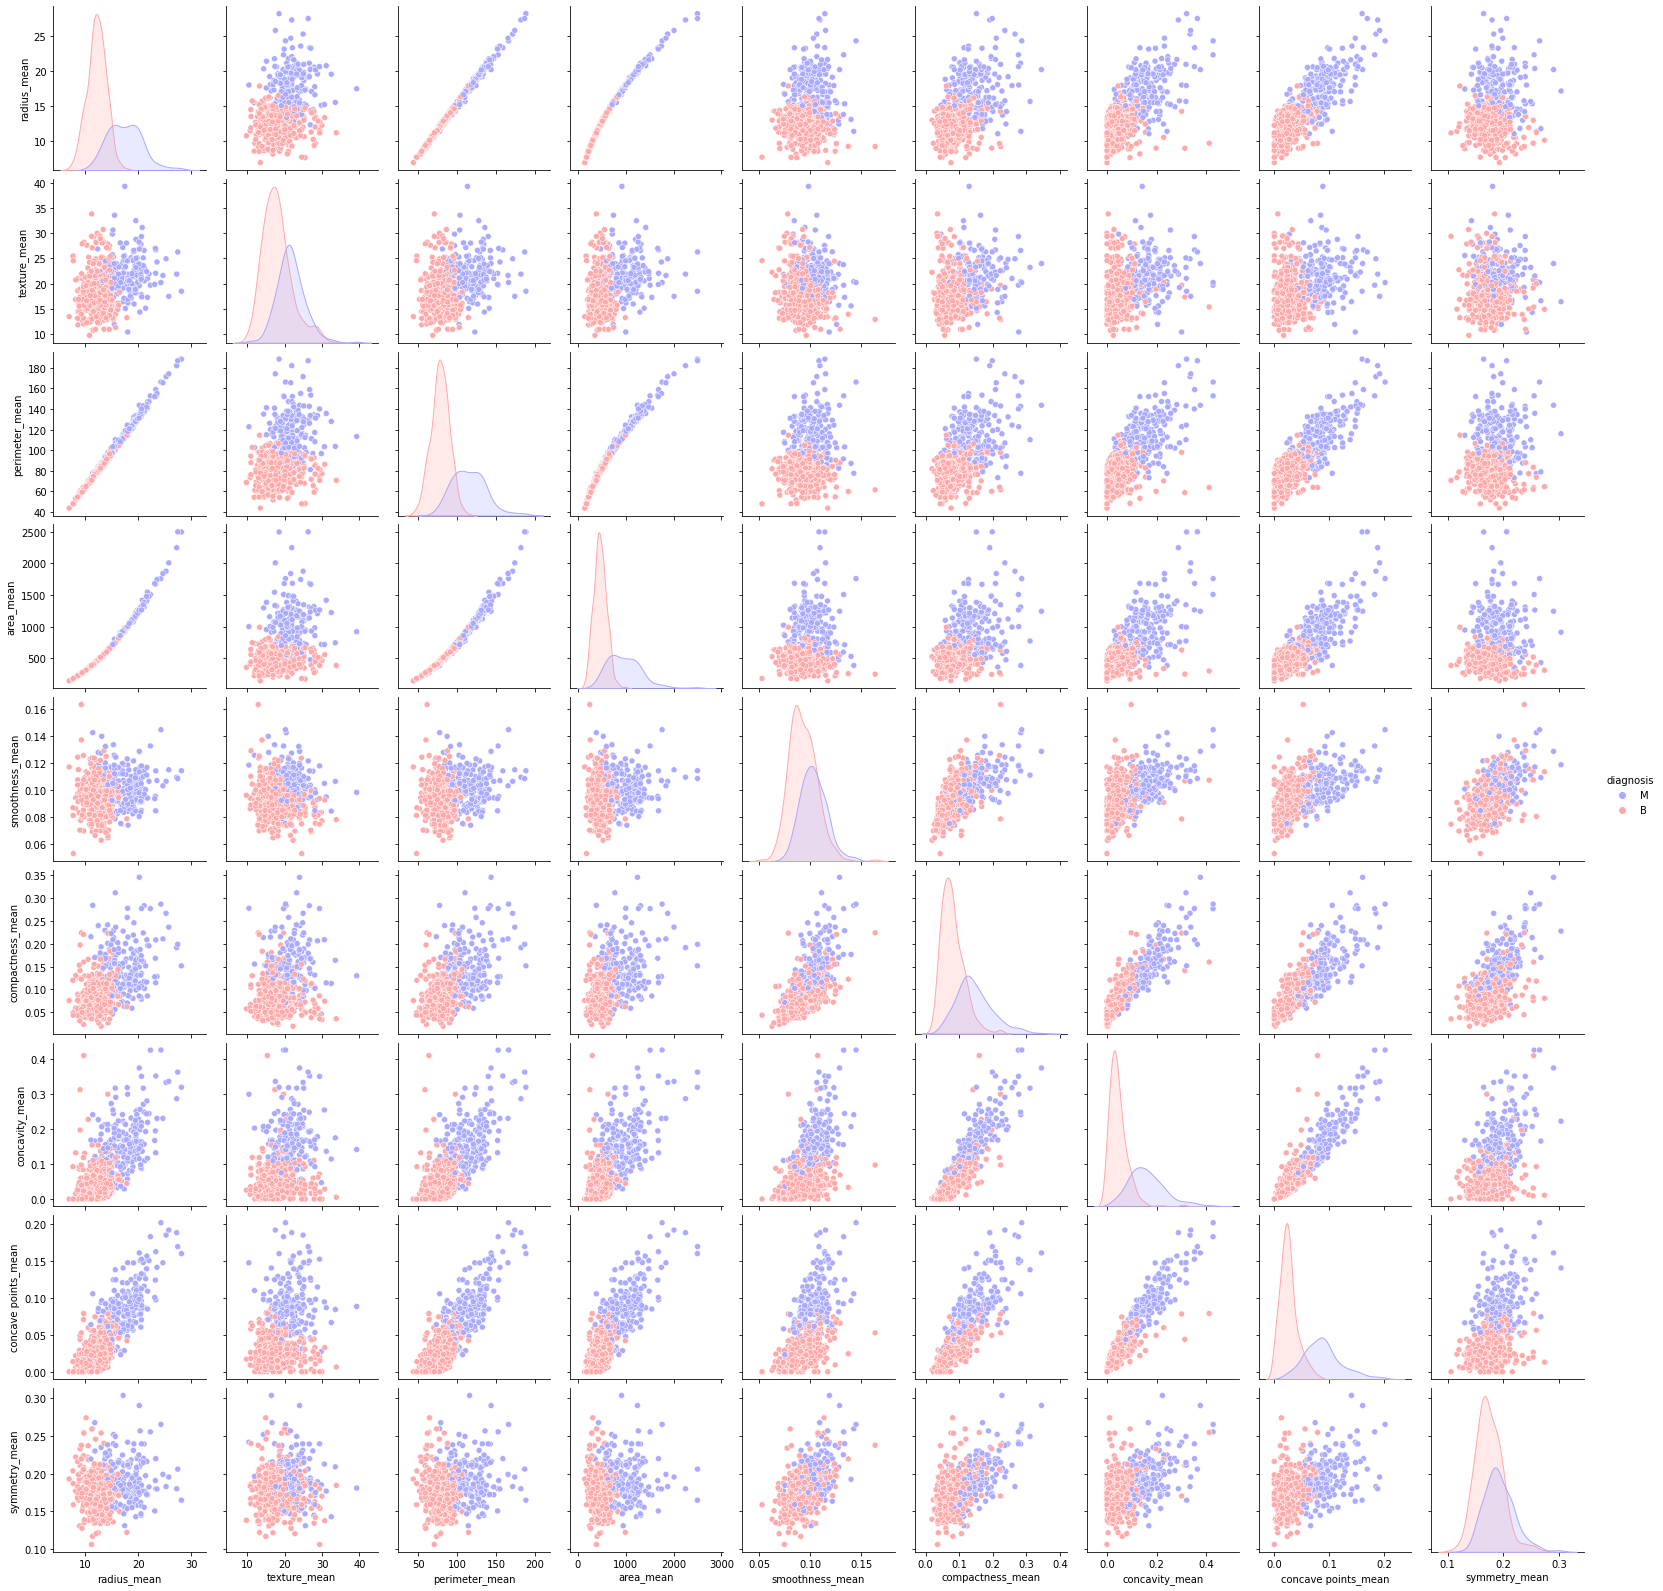

In [421]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')

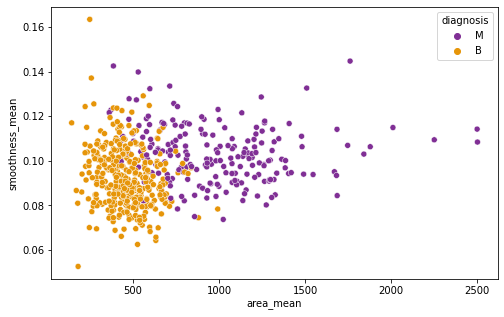

In [422]:
# area_mean vs smoothness_mean

sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=df, palette='CMRmap')

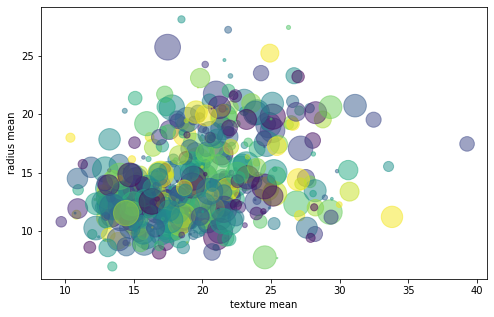

In [423]:
# texture mean vs radius_mean

size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c= colors, alpha=0.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



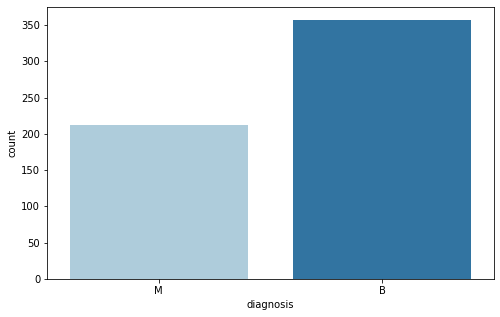

In [424]:
# Target variable

sns.countplot(df['diagnosis'],palette='Paired')

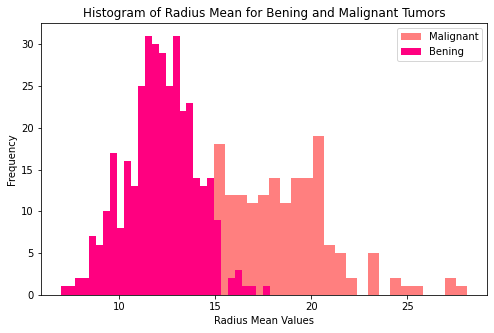

In [425]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")


plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

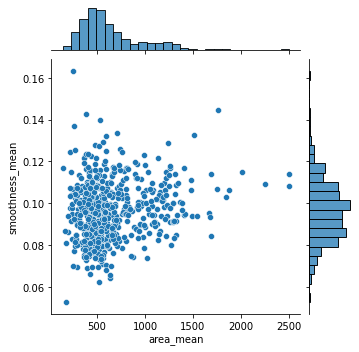

In [426]:
sns.jointplot(data= df, x='area_mean', y='smoothness_mean', height=5)

In [427]:
# Label Encoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

# **Model Training**

Make sure your data is arranged into a format acceptable for train test split. In scikit-learn, this consists of separating your full data set into “Features” and “Target.”


Split the data set into two pieces — a training set and a testing set. This consists of random sampling without replacement about 75 percent of the rows (you can vary this) and putting them into your training set. The remaining 25 percent is put into your test set. Note that the colors in “Features” and “Target” indicate where their data will go (“X_train,” “X_test,” “y_train,” “y_test”) for a particular train test split.

Train the model on the training set. This is “X_train” and “y_train” in the image.

Test the model on the testing set (“X_test” and “y_test” in the image) and evaluate the performance.

In [428]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.


Select a different value for random_state, different information would go to “X_train,” “X_test,” “y_train” and “y_test”. The random_state is a pseudo-random number parameter that allows us to reproduce the same train test split each time we run the code. 

There are a number of reasons why people use random_state, including software testing, tutorials like this one and talks. However, it is recommended we remove it if we are trying to see how well a model generalizes to new data.

In [429]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [430]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

# **K-Means Clustering** 

In [431]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [432]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', n_init=12, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


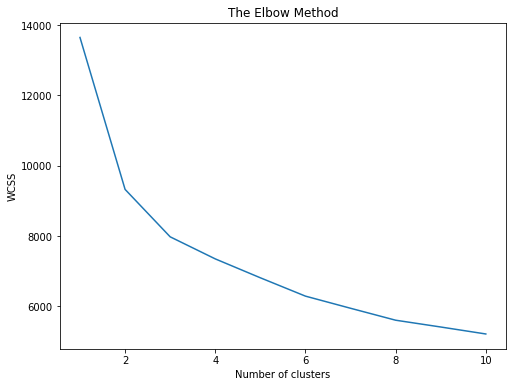

In [433]:
f3, ax = plt.subplots(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [434]:
#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(X_train)
#labels = kmeans.labels_

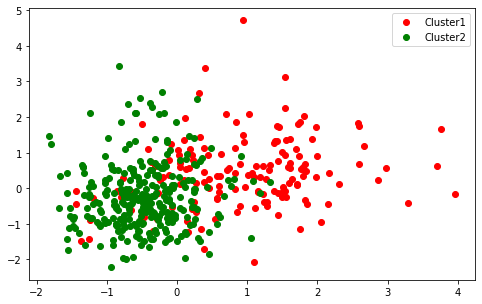

In [435]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_train[clusters==i,0],
               X_train[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

# **Gaussian Mixture Model (GMM) Clustering**

In [436]:
X1 = df.drop('diagnosis',axis=1)

In [437]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

#  Perform clsutering
gmm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gmm.fit(X1)

GaussianMixture(n_components=2, n_init=10)

In [438]:
gmm.means_

array([[1.21625159e+01, 1.81117822e+01, 7.81751817e+01, 4.64129320e+02,
        9.26691857e-02, 7.95351210e-02, 4.66280790e-02, 2.61352846e-02,
        1.74204234e-01, 6.27189069e-02, 2.89242932e-01, 1.23930447e+00,
        2.02597117e+00, 2.16631543e+01, 7.29671246e-03, 2.12101104e-02,
        2.61425809e-02, 1.00254128e-02, 2.05636974e-02, 3.60475269e-03,
        1.34048714e+01, 2.38160697e+01, 8.70998624e+01, 5.61493156e+02,
        1.25284263e-01, 1.79481980e-01, 1.65309729e-01, 7.49413320e-02,
        2.69640425e-01, 7.89783954e-02],
       [1.75957085e+01, 2.13689346e+01, 1.16319305e+02, 9.91637145e+02,
        1.02876168e-01, 1.48130748e-01, 1.63244155e-01, 8.91394718e-02,
        1.93444157e-01, 6.29365440e-02, 6.09821615e-01, 1.17722062e+00,
        4.34906577e+00, 7.33021385e+01, 6.58953275e-03, 3.30124849e-02,
        4.20461896e-02, 1.49219947e-02, 2.05045237e-02, 4.13057753e-03,
        2.13255680e+01, 2.89627155e+01, 1.42852023e+02, 1.44387232e+03,
        1.44874555e-01,

In [439]:
gmm.converged_

True

In [440]:
gmm.n_iter_

20

In [441]:
gmm.predict(X1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [442]:
gmm.weights_

array([0.63837544, 0.36162456])

In [443]:
np.unique(gmm.predict(X1), return_counts = True)[1]/len(X1)

array([0.63796134, 0.36203866])

In [444]:
gmm.sample()

(array([[2.20368643e+01, 2.11469215e+01, 1.47334022e+02, 1.47151047e+03,
         1.12776239e-01, 1.92957480e-01, 2.36260974e-01, 1.22926591e-01,
         2.14649743e-01, 6.39992034e-02, 6.87589836e-01, 1.27691923e+00,
         4.27978710e+00, 9.53454375e+01, 5.74076813e-03, 4.36038418e-02,
         4.97264591e-02, 1.24262137e-02, 2.31332575e-02, 3.20766878e-03,
         2.71517759e+01, 3.18871432e+01, 1.78258914e+02, 2.26198693e+03,
         1.58045848e-01, 5.33646401e-01, 6.26076977e-01, 2.33007347e-01,
         3.80866726e-01, 9.48158683e-02]]), array([1]))

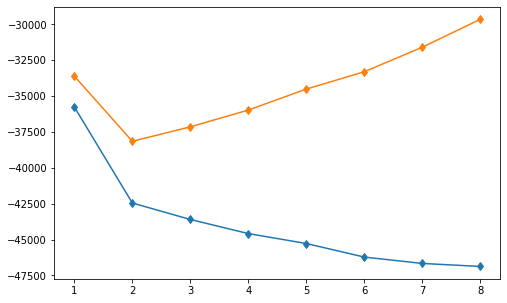

In [445]:
bic = []
aic = []
for i in range(8):
    gmm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gmm.fit(X1)
    bic.append(gmm.bic(X1))
    aic.append(gmm.aic(X1))
    
# Look at the plots

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = 'bic')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



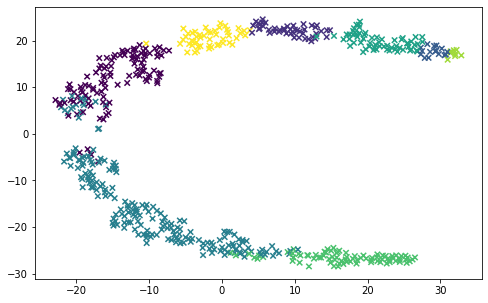

In [446]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X1)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=30,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gmm.predict(X1)   # Colour as per gmm
            )

In [447]:
densities = gmm.score_samples(X1)
densities

array([ 30.73874068,  40.84856187,  42.06829084,  -0.74720125,
        39.83046907,  49.57521508,  43.91461898,  42.46011876,
        41.53730521,  24.30043462,  47.71381266,  45.96185573,
        34.93210273,  50.47265504,  42.56732995,  41.64445696,
        49.72973745,  42.79857419,  68.48084654,  52.72716175,
        50.71655822,  51.49744324,  41.6525744 ,  68.48524792,
        32.19300118,  38.64632001,  35.38994043,  46.3242946 ,
        38.30990028,  43.35944748,  41.02170933,  25.56311396,
        44.07181356,  35.21048729,  43.3489576 ,  39.09265862,
        35.95960935,  37.81201204,  13.85523292,  40.43149069,
        52.43229054,  38.3279871 ,  29.17311034,  48.65839988,
        38.22358106,  38.63389477,  51.4787293 ,  50.90440292,
        51.32451909,  50.73048531,  57.53256537,  52.63777578,
        56.65843564,  40.49355218,  49.89953398,  58.49096343,
        43.21386638,  44.12205352,  55.94737142,  45.69605135,
        41.99589684,  46.41993545,  38.58327815,  46.87

In [448]:
density_threshold = np.percentile(densities,4)
density_threshold

30.58918031036641

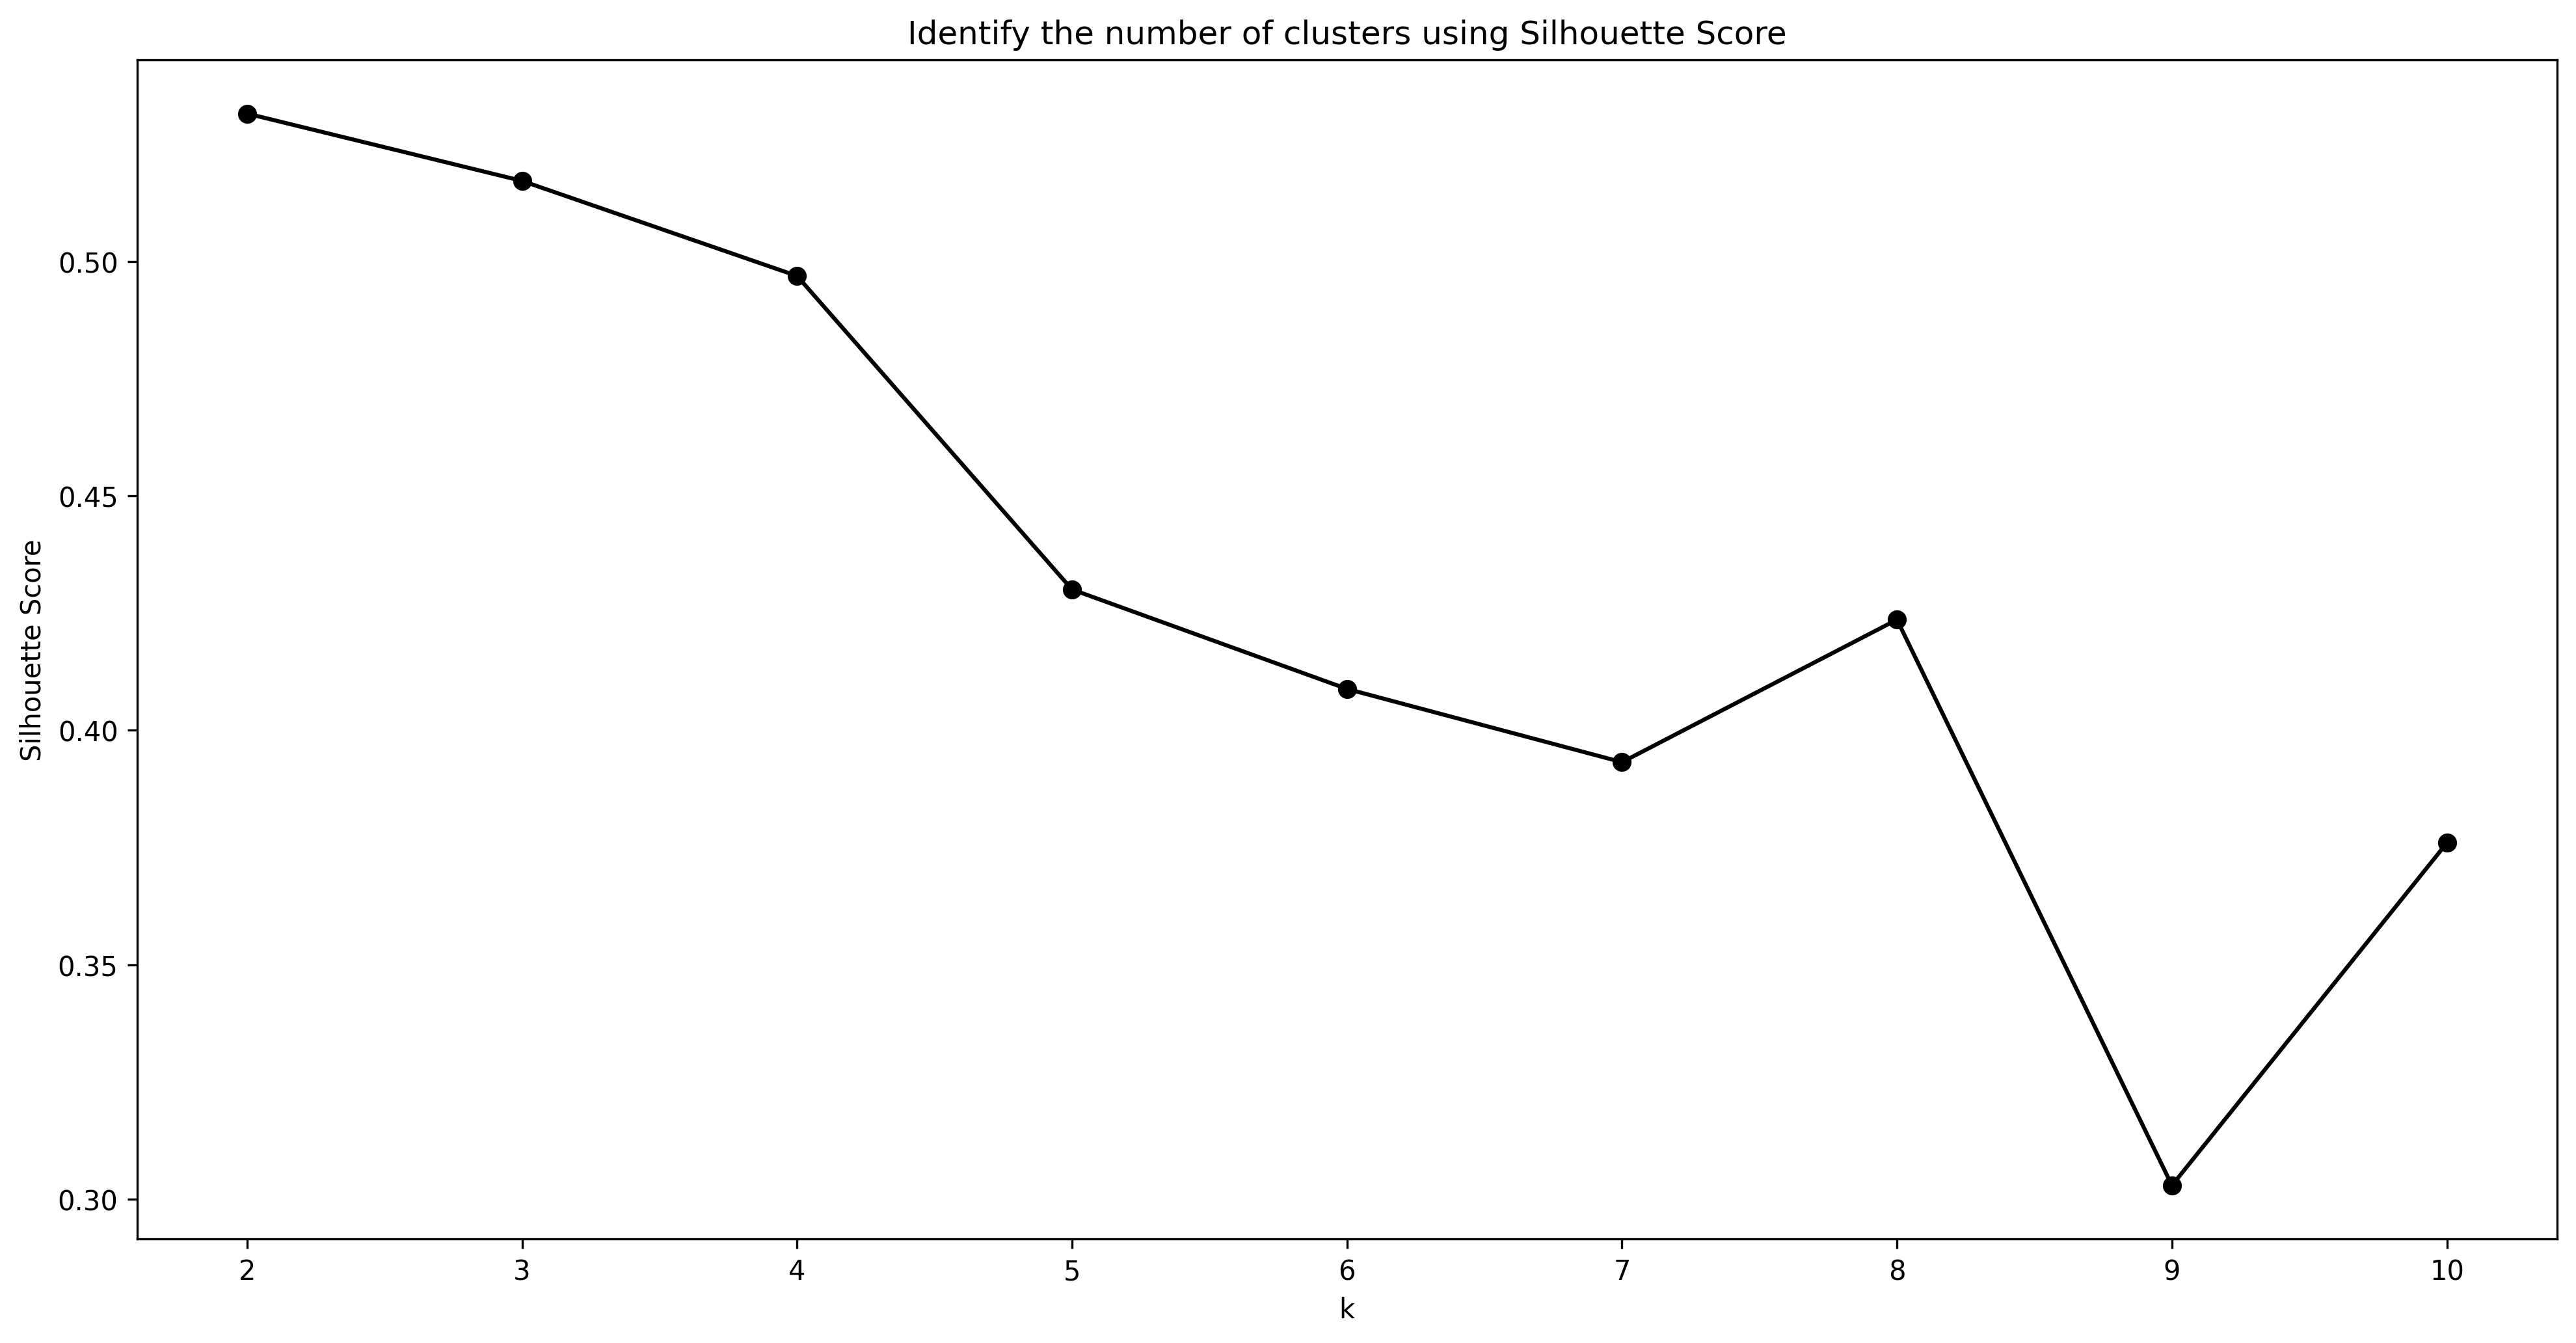

In [449]:
# Create empty list
from sklearn import metrics
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = X1.copy()
for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

# **DBSCAN Clustering**

In [450]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=1,metric='euclidean')

In [451]:
X1 = df.drop('diagnosis',axis=1)

In [452]:
model=db.fit(X1)

In [453]:
label=model.labels_

In [454]:
label

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [455]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 569


In [456]:
dbscan = DBSCAN(eps=1.2, min_samples=50).fit(X1)

In [457]:
pd.Series(dbscan.labels_).unique()

array([-1])

In [458]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(X1)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

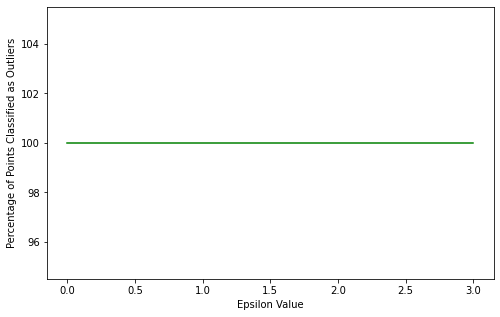

In [459]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [460]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(X1)

DBSCAN(eps=1.2, min_samples=8)

In [461]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [485]:
import plotly.express as px

fig = px.scatter_3d(X1, x='concave points_mean', y='symmetry_mean', z='radius_mean', 
                    color=dbscan.labels_, symbol='smoothness_worst', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.show()

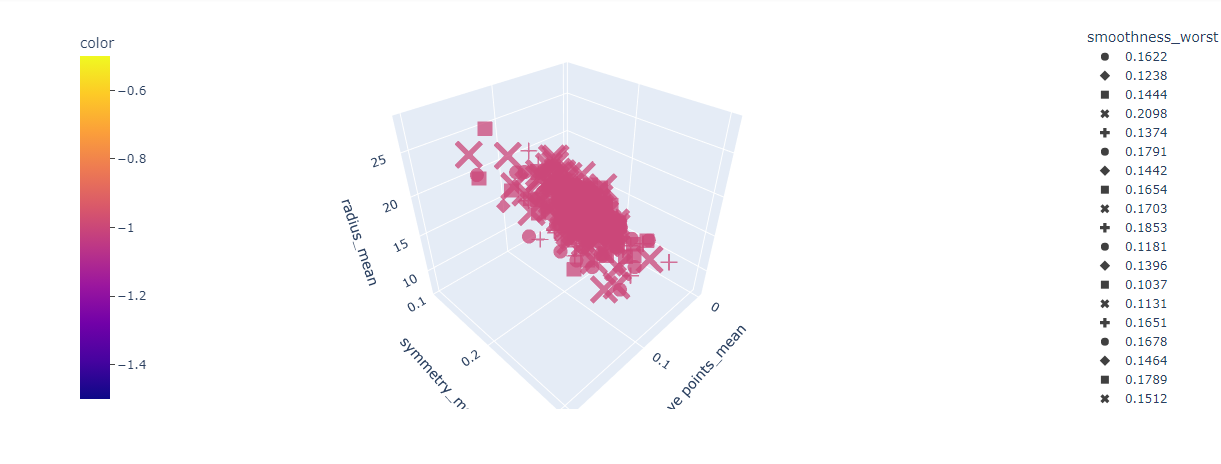

#**Evaluate Models**

# **Logistic Regression**

In [463]:

# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

# **Gaussian Naive Bayes Classifier**

In [464]:
# Gaussian Naive Bayes Classifier

gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

Y_pred_gnb = gaussian.predict(X_test)

# **Gradient Boosting Classifier**

In [465]:
# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

# **Random Forest Classifier**

In [466]:
# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# **Decision Tree Classifier**

In [467]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# **KNeighbors Classifier**

In [468]:
# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# **XGB Classifier**

In [469]:
# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

# **Support Vector classifier**

In [470]:
# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [471]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [472]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB(), KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


A = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB", "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))   

In [473]:
d = { "Accuracy" : models , "Algorithm" : A }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.982456,SVC
1,0.947368,DecisionTreeClassifier
2,0.973684,LogisticRegression
3,0.964912,GaussianNB
4,0.947368,KNeighborsClassifier
5,0.964912,RandomForestClassifier
6,0.964912,GradientBoostingClassifier
7,0.956140,XGB


Text(0.5, 1.0, 'Accuracy of all Algorithms')

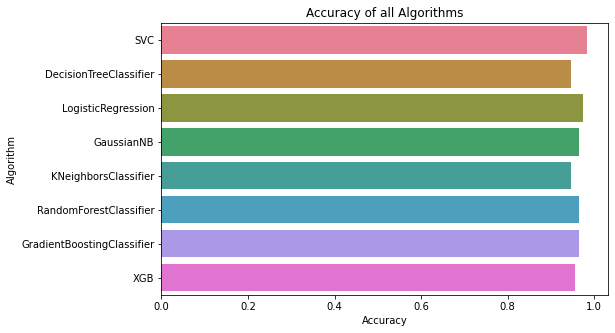

In [474]:
sns.barplot(data=data_frame, x=data_frame['Accuracy'], y=data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')

In [476]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,41,2
healthy,0,71


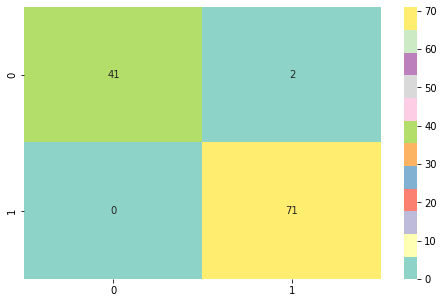

In [477]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')

# **Accuracy Score**

In [478]:
print(accuracy_score(y_test, y_pred_svc))

0.9824561403508771


# **Precision Score**

In [479]:
print(precision_score(y_test, y_pred_svc))

1.0


# **Recall Score**

In [480]:
print(recall_score(y_test, y_pred_svc))

0.9534883720930233


# **Classification Report**

In [481]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



0.99737962659679


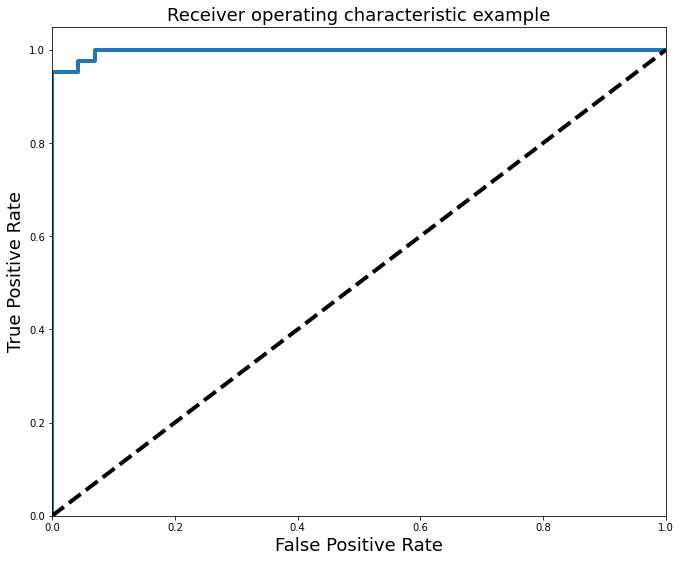

In [482]:
#plt.style.use('seaborn-pastel')

y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example', fontsize= 18)
plt.show()

In [483]:
roc_auc_score(y_test, y_score)

0.99737962659679